# Capstone Project

## Installations and Imports

In [1]:
!pip install pyextremes
!pip install yfinance
!pip install pandas numpy
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 22.2 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from arch import arch_model
import os
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy.stats import t
import matplotlib.pyplot as plt
from pyextremes import plot_mean_residual_life
from pyextremes import plot_parameter_stability
import pandas as pd

## Downloading necessary data

In [3]:
# Tickers of stocks to be included in the analysis
crypto_list = [
    'BTC-USD', 'ETH-USD', 'USDT-USD', 'XRP-USD',
    'DOGE-USD', 'ADA-USD', 'TRX-USD', 'LINK-USD',
    'XLM-USD', 'AVAX-USD', 'LEO-USD',
    'BCH-USD', 'LTC-USD', 'DOT-USD', 'OM-USD'
]

In [4]:
# Dictionary to store the data for each cryptocurrency
crypto_data = {}

# Fetch data for each cryptocurrency in the list
for crypto in crypto_list:
    print(f"Fetching data for {crypto}...")
    crypto_data[crypto] = yf.download(crypto, start='2021-01-01', end='2024-12-31')

# Example: Access Bitcoin data
btc_data = crypto_data['BTC-USD']
print(btc_data.head())


Fetching data for BTC-USD...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Fetching data for ETH-USD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for USDT-USD...
Fetching data for XRP-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for DOGE-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADA-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for TRX-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for LINK-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for XLM-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for AVAX-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for LEO-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for BCH-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for LTC-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for DOT-USD...


[*********************100%***********************]  1 of 1 completed


Fetching data for OM-USD...


[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2021-01-01  29374.152344  29600.626953  28803.585938  28994.009766   
2021-01-02  32127.267578  33155.117188  29091.181641  29376.455078   
2021-01-03  32782.023438  34608.558594  32052.316406  32129.408203   
2021-01-04  31971.914062  33440.218750  28722.755859  32810.949219   
2021-01-05  33992.429688  34437.589844  30221.187500  31977.041016   

Price            Volume  
Ticker          BTC-USD  
Date                     
2021-01-01  40730301359  
2021-01-02  67865420765  
2021-01-03  78665235202  
2021-01-04  81163475344  
2021-01-05  67547324782  


## Compute Log Returns

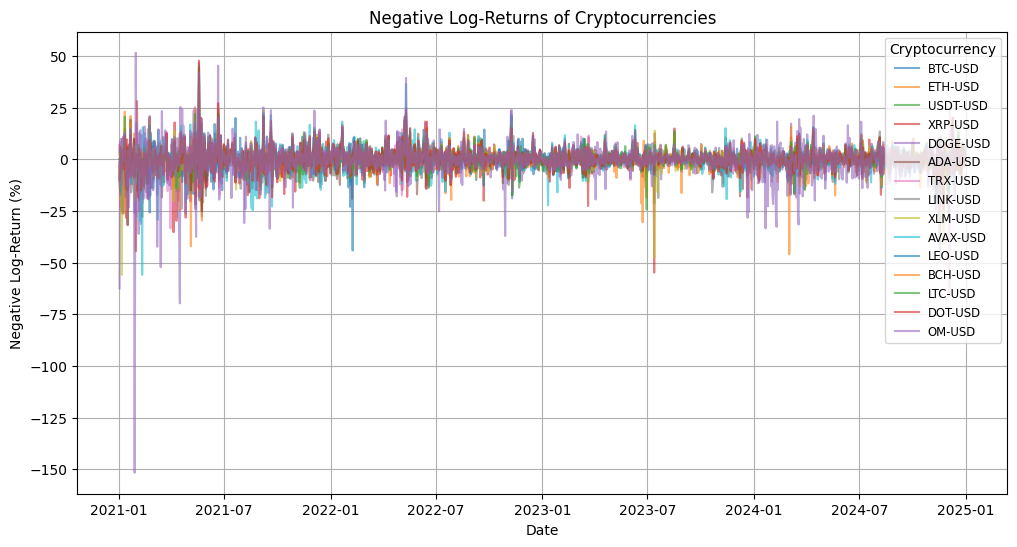

In [5]:
# Dictionaries to store Close prices and negative log returns
crypto_close_prices = {}
crypto_negative_log_returns = {}

for crypto, data in crypto_data.items():
    # Select 'Close' prices
    close_prices = data['Close'].dropna()
    crypto_close_prices[crypto] = close_prices

    # Compute negative log-returns
    negative_log_returns = -np.log(close_prices / close_prices.shift(1))*100

    # Filter only negative log returns (losses)
    negative_log_returns = negative_log_returns.dropna()
    crypto_negative_log_returns[crypto] = negative_log_returns

# Plot the negative log-returns
plt.figure(figsize=(12, 6))
for crypto, neg_log_ret in crypto_negative_log_returns.items():
    plt.plot(neg_log_ret.index, neg_log_ret, label=crypto, alpha=0.6)

plt.title("Negative Log-Returns of Cryptocurrencies")
plt.xlabel("Date")
plt.ylabel("Negative Log-Return (%)")
plt.legend(title="Cryptocurrency", loc="upper right", fontsize="small")
plt.grid(True)
plt.show()


### Visualizations of negative log returns for each cryptocurrency.

In [6]:
# Create directory to save the plots
os.makedirs("negative_log_return_plots", exist_ok=True)

# Dictionary to store Close prices and negative log returns
crypto_close_prices = {}
crypto_negative_log_returns = {}

for crypto, data in crypto_data.items():
    # Select 'Close' prices
    close_prices = data['Close'].dropna()
    crypto_close_prices[crypto] = close_prices

    # Compute negative log-returns
    negative_log_returns = -np.log(close_prices / close_prices.shift(1)) * 100
    negative_log_returns = negative_log_returns.dropna()
    crypto_negative_log_returns[crypto] = negative_log_returns

    # Plot in greyscale
    plt.figure(figsize=(10, 4))
    plt.plot(negative_log_returns.index, negative_log_returns, color='black', alpha=0.7)
    plt.title(f"{crypto} - Negative Log Returns")
    plt.xlabel("Date")
    plt.ylabel("Negative Log Return (%)")
    plt.grid(True)
    plt.tight_layout()

    # Save the plot
    plt.savefig(f"negative_log_return_plots/{crypto}_negative_log_returns.png", dpi=300)
    plt.close()


### Summary of Data

In [7]:
# Create a dictionary to store the counts
data_summary = {
    "Cryptocurrency": [],
    "Close Price Entries": [],
    "Loss Events": []
}

# Populate the dictionary with data
for crypto in crypto_list:
    data_summary["Cryptocurrency"].append(crypto)
    data_summary["Close Price Entries"].append(len(crypto_close_prices[crypto]))
    data_summary["Loss Events"].append(len(crypto_negative_log_returns[crypto]))

# Convert to a DataFrame
df_summary = pd.DataFrame(data_summary)

# Display the table
print(df_summary)


   Cryptocurrency  Close Price Entries  Loss Events
0         BTC-USD                 1460         1459
1         ETH-USD                 1460         1459
2        USDT-USD                 1460         1459
3         XRP-USD                 1460         1459
4        DOGE-USD                 1460         1459
5         ADA-USD                 1460         1459
6         TRX-USD                 1460         1459
7        LINK-USD                 1460         1459
8         XLM-USD                 1460         1459
9        AVAX-USD                 1460         1459
10        LEO-USD                 1460         1459
11        BCH-USD                 1460         1459
12        LTC-USD                 1460         1459
13        DOT-USD                 1460         1459
14         OM-USD                 1460         1459


## General Statistics

In [8]:
# Create a dictionary to store the statistics
data_stats_summary = {
    "Cryptocurrency": [],
    "Mean": [],
    "Standard Deviation": [],
    "Variance": [],
    "Kurtosis": [],
    "Skewness": []
}

# Loop through each cryptocurrency to calculate the statistics
for crypto, log_returns in crypto_negative_log_returns.items():
    log_returns = log_returns.dropna()

    # Calculate the required statistics
    mean_return = float(np.mean(log_returns))
    std_dev = float(np.std(log_returns, ddof=1))  # Sample standard deviation
    variance = float(np.var(log_returns, ddof=1))  # Sample variance
    kurt = float(kurtosis(log_returns, fisher=True))  # Excess kurtosis
    skewness = float(skew(log_returns))

    # Append the values
    data_stats_summary["Cryptocurrency"].append(crypto)
    data_stats_summary["Mean"].append(mean_return)
    data_stats_summary["Standard Deviation"].append(std_dev)
    data_stats_summary["Variance"].append(variance)
    data_stats_summary["Kurtosis"].append(kurt)
    data_stats_summary["Skewness"].append(skewness)

# Convert to a DataFrame
df_summary_stats = pd.DataFrame(data_stats_summary)

# Display the table in a cleaner format
print(df_summary_stats.head())  # This will print the table without the index column

# Save the DataFrame to an Excel file
file_path = '/crypto_summary_stats.xlsx'
df_summary_stats.to_excel(file_path)


  Cryptocurrency      Mean  Standard Deviation   Variance    Kurtosis  \
0        BTC-USD -0.078728            3.239720  10.495785    3.487080   
1        ETH-USD -0.104529            4.177280  17.449667    5.651175   
2       USDT-USD  0.000263            0.061188   0.003744  119.586613   
3        XRP-USD -0.148002            5.352047  28.644404   17.339139   
4       DOGE-USD -0.274847            7.814860  61.072044  106.480087   

   Skewness  
0  0.139364  
1  0.297789  
2  1.960784  
3 -1.316142  
4 -5.874648  


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
<ipython-input-8-ab77a4e9b01e>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std_dev = float(np.std(log_returns, ddof=1))  # Sample standard deviation
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
<ipython-input-8-ab77a4e9b01e>:18: FutureWarni

## Fitting ARMA-GARCH model and taking the residuals

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.043e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Standardized residuals for BTC-USD saved to BTC-USD_std_residuals.csv


<Figure size 1000x600 with 0 Axes>

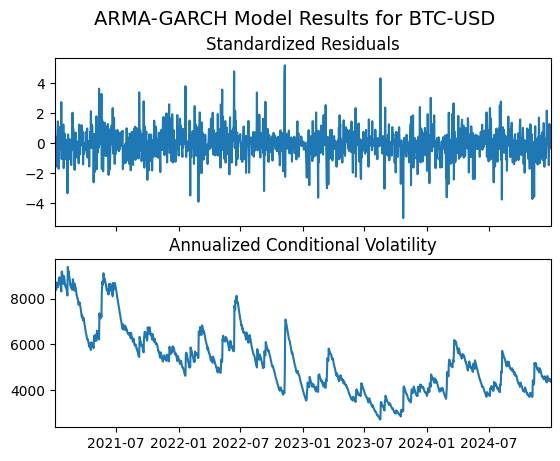

Standardized residuals for ETH-USD saved to ETH-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.74e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

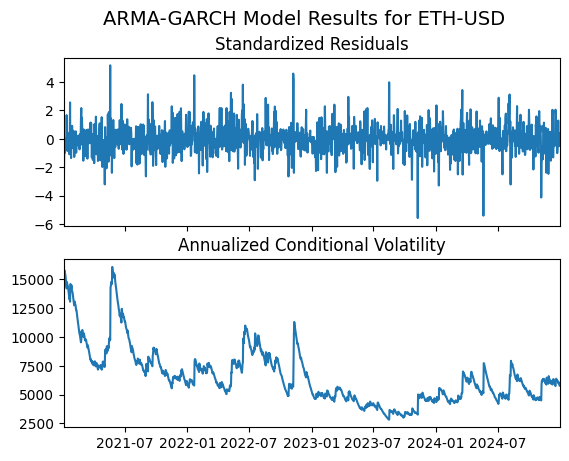

Standardized residuals for USDT-USD saved to USDT-USD_std_residuals.csv


<Figure size 1000x600 with 0 Axes>

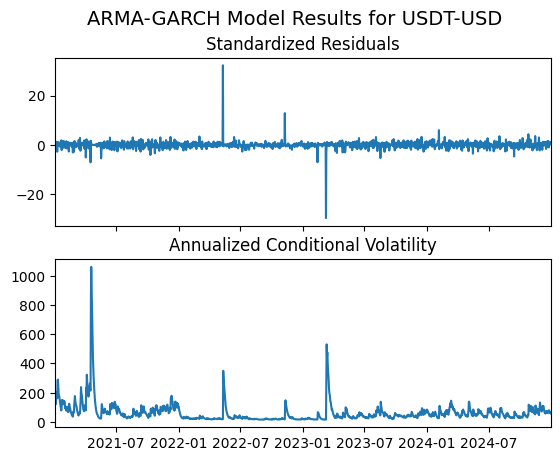

Standardized residuals for XRP-USD saved to XRP-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.86e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

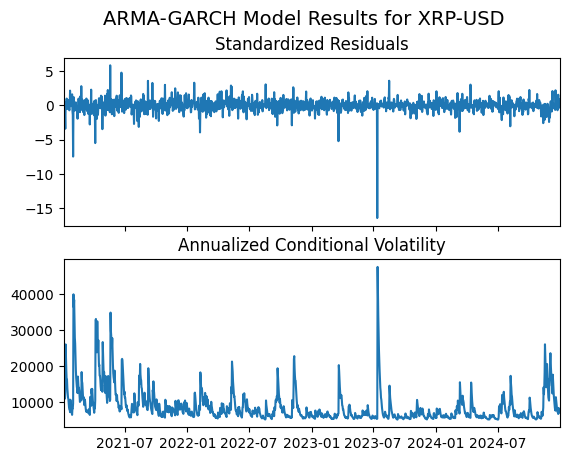

Standardized residuals for DOGE-USD saved to DOGE-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.842e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

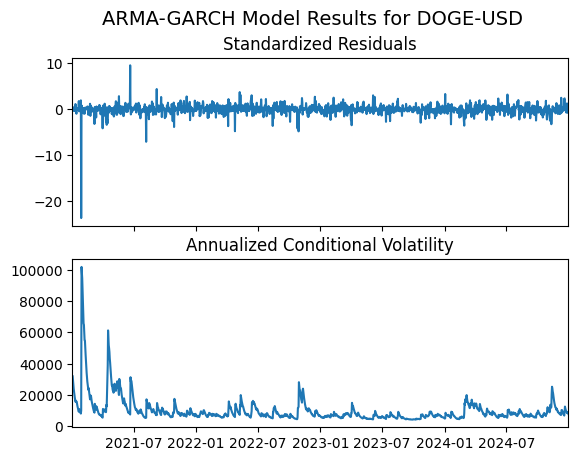

Standardized residuals for ADA-USD saved to ADA-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.465e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

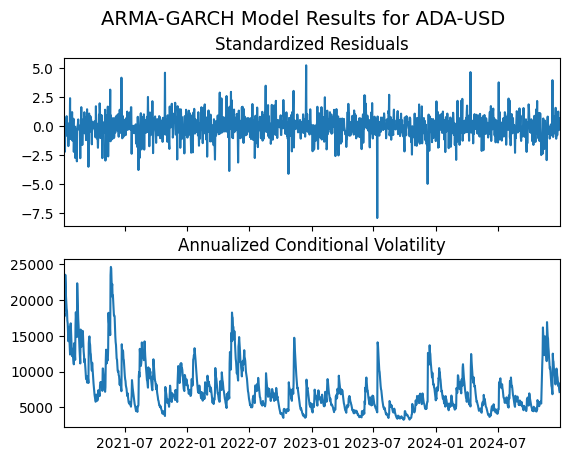

Standardized residuals for TRX-USD saved to TRX-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.954e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

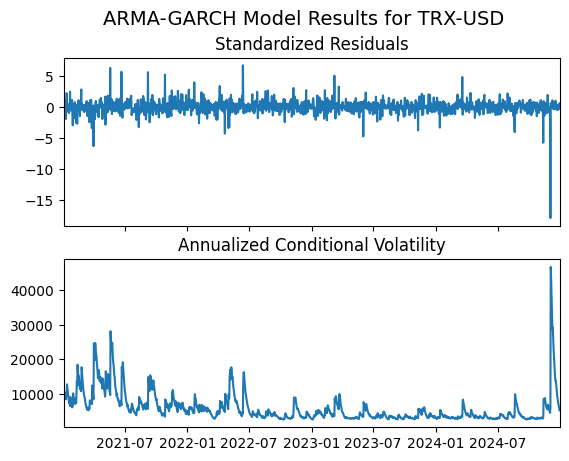

Standardized residuals for LINK-USD saved to LINK-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.952e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

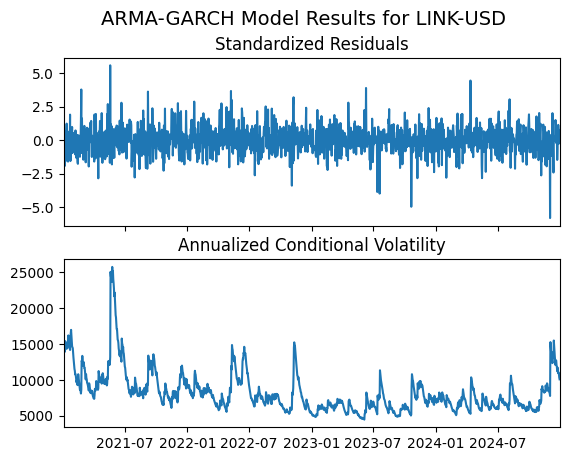

Standardized residuals for XLM-USD saved to XLM-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.613e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

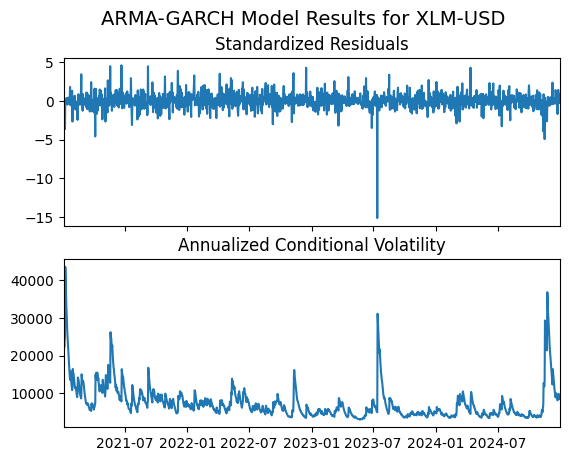

Standardized residuals for AVAX-USD saved to AVAX-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.099e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

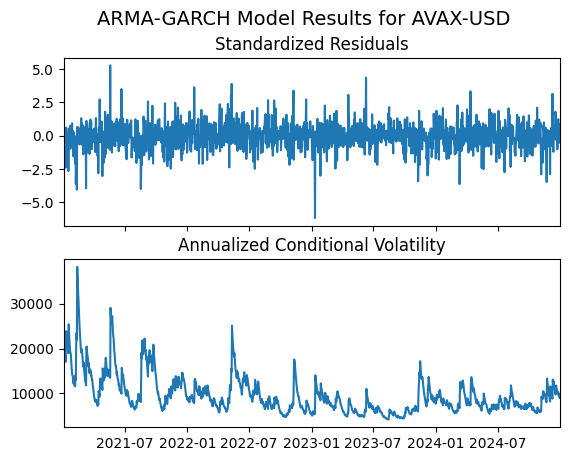

Standardized residuals for LEO-USD saved to LEO-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.015e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

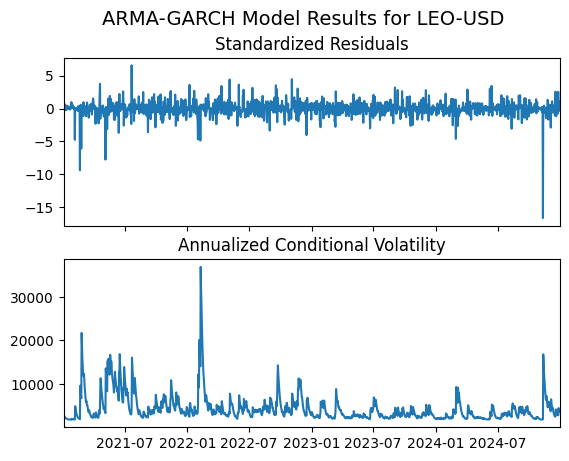

Standardized residuals for BCH-USD saved to BCH-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.652e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

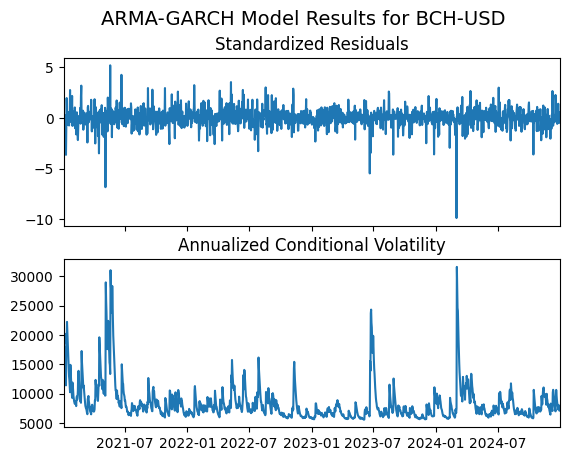

Standardized residuals for LTC-USD saved to LTC-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.158e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

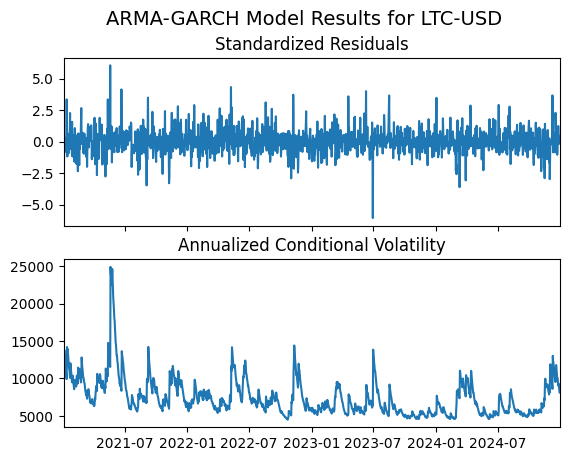

Standardized residuals for DOT-USD saved to DOT-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.812e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

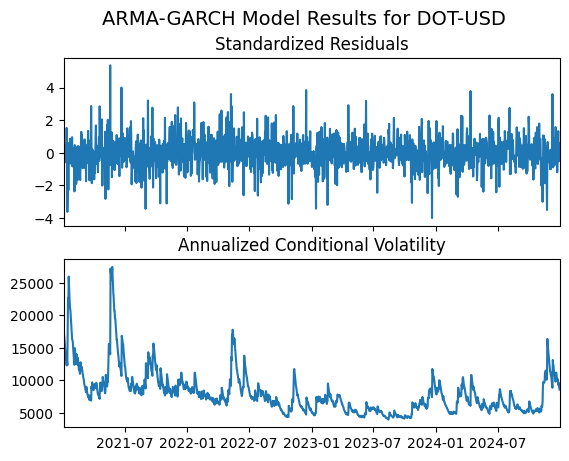

Standardized residuals for OM-USD saved to OM-USD_std_residuals.csv


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.209e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<Figure size 1000x600 with 0 Axes>

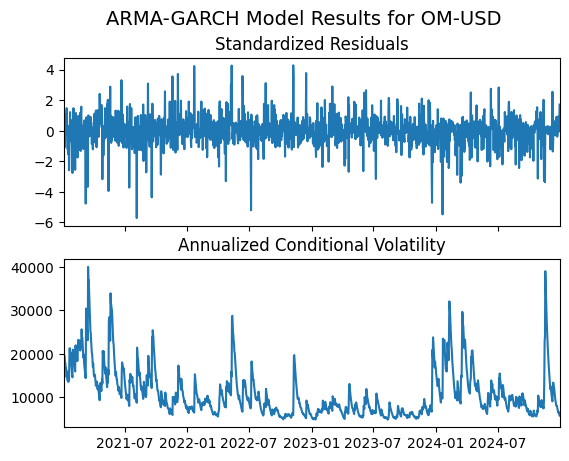

In [10]:
# Dictionary to store model results and residuals for each crypto
crypto_models = {}
crypto_residuals = {}

# Loop through each cryptocurrency
for crypto in crypto_list:
    # Fit ARMA-GARCH model for log returns
    model = arch_model(crypto_negative_log_returns[crypto]*100, vol='Garch', p=1, o=0, q=1, mean='AR', lags=1, dist='t')
    results = model.fit(disp='off')  # Fit the model

    # Store results and residuals in dictionaries
    crypto_models[crypto] = results
    crypto_residuals[crypto] = results.std_resid


    # Create a DataFrame for residuals
    residuals_df = pd.DataFrame({'Standardized Residuals': results.std_resid})

    # Drop rows where all values are NaN (if any)
    residuals_df.dropna(how='all', inplace=True)

    # Reset the index after dropping NaNs
    residuals_df.reset_index(drop=True, inplace=True)

    # Save the residuals to a CSV file
    csv_filename = f"{crypto}_std_residuals.csv"
    residuals_df.to_csv(csv_filename, index=False)
    print(f"Standardized residuals for {crypto} saved to {csv_filename}")

    # Plot the results with a heading for each crypto
    fig = plt.figure(figsize=(10, 6))
    results.plot(annualize='D')

    # Add a title to the graph
    plt.suptitle(f"ARMA-GARCH Model Results for {crypto}", fontsize=14)

    # Show the plot
    plt.show()

## Visualizing the Residuals

Visualizing the QQ plot and ACF plots of the standardized residuals.

The QQ plot (Quantile-Quantile plot) assesses whether the standardized residuals follow a normal distribution. Deviations from the 45-degree line indicate departures from normality, such as heavy tails or skewness.

The ACF of standardized residuals examines autocorrelation in the mean, revealing if any linear dependence remains after model fitting.

The ACF of squared standardized residuals evaluates autocorrelation in the variance, helping to detect volatility clustering or conditional heteroskedasticity—common features in financial time series.

In [11]:
# Apply grayscale style
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Base folder for outputs
base_folder = "crypto_diagnostics"
os.makedirs(base_folder, exist_ok=True)

# Generate and save each plot separately
for crypto, results in crypto_models.items():
    std_residuals = results.std_resid
    std_residuals_squared = std_residuals ** 2
    df = results.params['nu']  # Degrees of freedom for t-distribution

    # Create folder for this crypto
    crypto_folder = os.path.join(base_folder, crypto)
    os.makedirs(crypto_folder, exist_ok=True)

    # --- 1. Standardized Residuals ---
    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals, label="Standardized Residuals", color='black')
    plt.axhline(y=0, linestyle="--", color="gray", linewidth=1)
    plt.title("Standardized Residuals")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(crypto_folder, f"{crypto}_residuals.png"), dpi=300)
    plt.close()

    # --- 2. ACF of Standardized Residuals ---
    fig, ax = plt.subplots(figsize=(10, 4))
    plot_acf(std_residuals.dropna(), ax=ax)
    ax.set_title("ACF of Standardized Residuals")
    plt.tight_layout()
    plt.savefig(os.path.join(crypto_folder, f"{crypto}_acf_residuals.png"), dpi=300)
    plt.close()

    # --- 3. ACF of Squared Standardized Residuals ---
    fig, ax = plt.subplots(figsize=(10, 4))
    plot_acf(std_residuals_squared.dropna(), ax=ax)
    ax.set_title("ACF of Squared Standardized Residuals")
    plt.tight_layout()
    plt.savefig(os.path.join(crypto_folder, f"{crypto}_acf_squared_residuals.png"), dpi=300)
    plt.close()

    # --- 4. QQ Plot ---
    fig, ax = plt.subplots(figsize=(10, 4))
    sm.qqplot(std_residuals, dist=t, distargs=(df,), line=None, ax=ax, color='black')
    ax.set_title("QQ Plot of Residuals")
    plt.tight_layout()
    plt.savefig(os.path.join(crypto_folder, f"{crypto}_qq_plot.png"), dpi=300)
    plt.close()


/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


## Choose a Threshold to fit GPD distribution

### Mean Residual Life Plots

Plotting Mean Residual Life for BTC-USD...


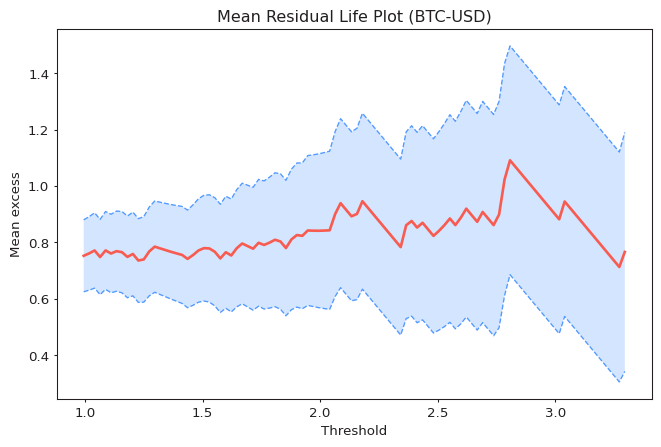


BTC-USD Standardized Residuals:
Date
2021-01-03   -0.443779
2021-01-04    0.461031
2021-01-05   -1.129934
2021-01-06   -1.557203
2021-01-07   -1.295629
Name: std_resid, dtype: float64
Plotting Mean Residual Life for ETH-USD...


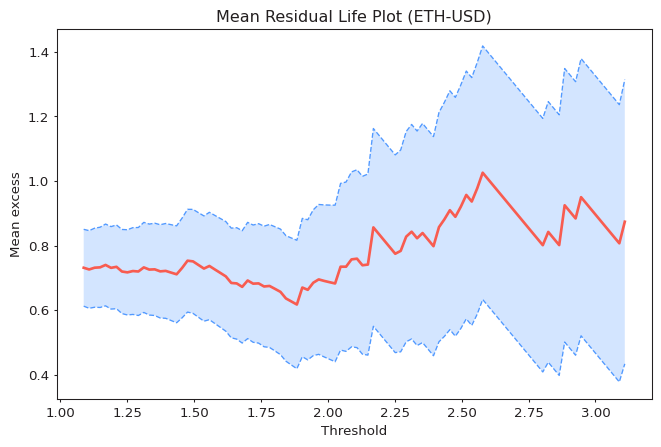


ETH-USD Standardized Residuals:
Date
2021-01-03   -2.638538
2021-01-04   -0.768104
2021-01-05   -0.594090
2021-01-06   -0.979009
2021-01-07   -0.201762
Name: std_resid, dtype: float64
Plotting Mean Residual Life for USDT-USD...


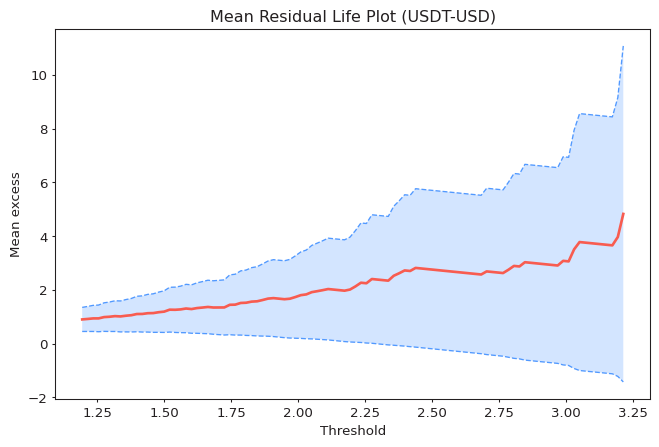


USDT-USD Standardized Residuals:
Date
2021-01-03    0.430801
2021-01-04    0.459697
2021-01-05   -2.548920
2021-01-06    0.085985
2021-01-07    1.234934
Name: std_resid, dtype: float64
Plotting Mean Residual Life for XRP-USD...


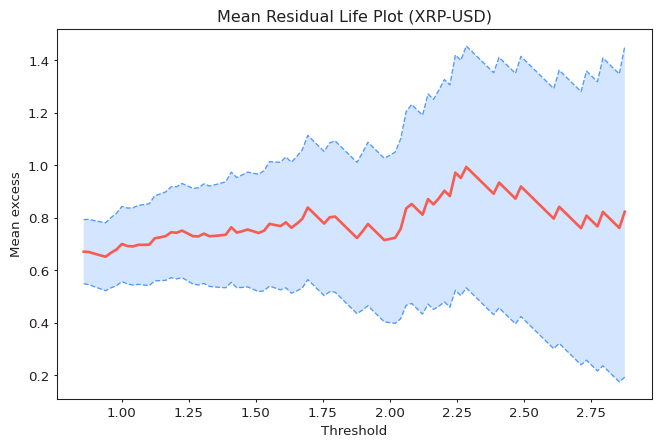


XRP-USD Standardized Residuals:
Date
2021-01-03   -0.124694
2021-01-04   -0.601194
2021-01-05    0.494329
2021-01-06   -1.410864
2021-01-07   -3.410457
Name: std_resid, dtype: float64
Plotting Mean Residual Life for DOGE-USD...


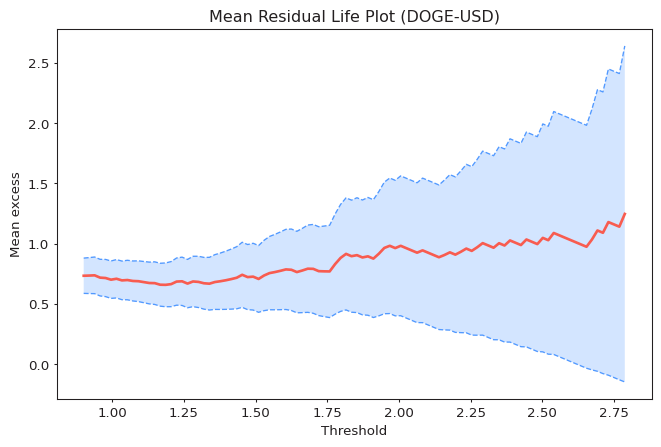


DOGE-USD Standardized Residuals:
Date
2021-01-03    0.052763
2021-01-04    0.048251
2021-01-05   -0.099880
2021-01-06   -0.373950
2021-01-07    0.464137
Name: std_resid, dtype: float64
Plotting Mean Residual Life for ADA-USD...


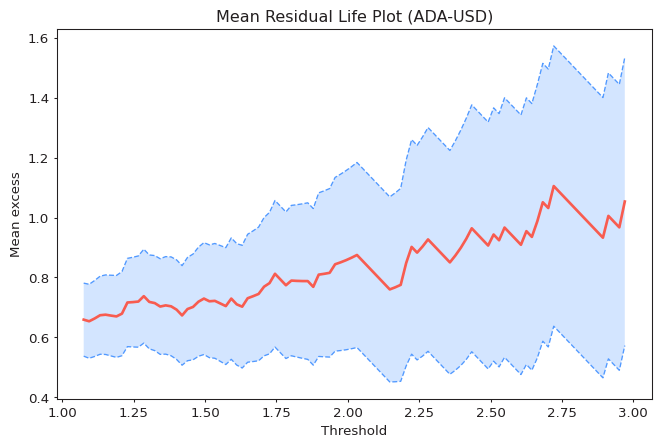


ADA-USD Standardized Residuals:
Date
2021-01-03   -1.360492
2021-01-04   -0.860347
2021-01-05   -1.281733
2021-01-06   -2.185010
2021-01-07    0.614392
Name: std_resid, dtype: float64
Plotting Mean Residual Life for TRX-USD...


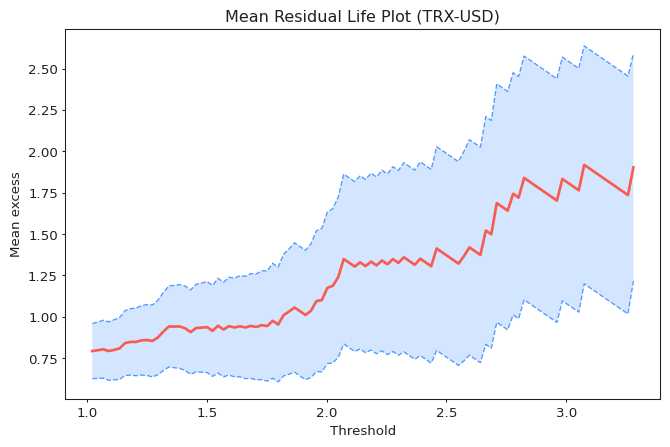


TRX-USD Standardized Residuals:
Date
2021-01-03   -1.312746
2021-01-04   -0.790603
2021-01-05    1.144449
2021-01-06   -0.832981
2021-01-07   -0.356858
Name: std_resid, dtype: float64
Plotting Mean Residual Life for LINK-USD...


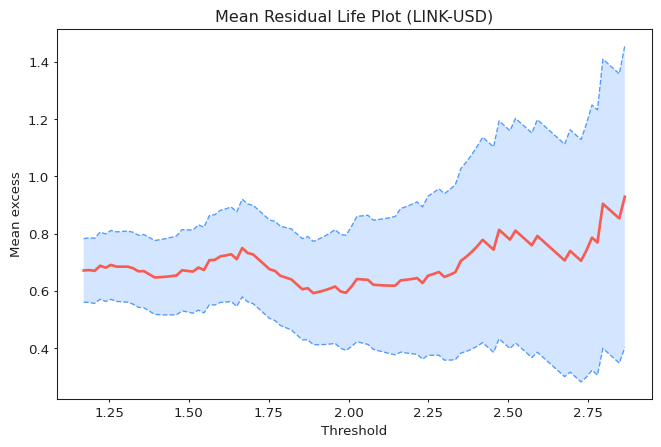


LINK-USD Standardized Residuals:
Date
2021-01-03   -1.189702
2021-01-04    0.021705
2021-01-05   -0.759919
2021-01-06   -1.914507
2021-01-07    0.639325
Name: std_resid, dtype: float64
Plotting Mean Residual Life for XLM-USD...


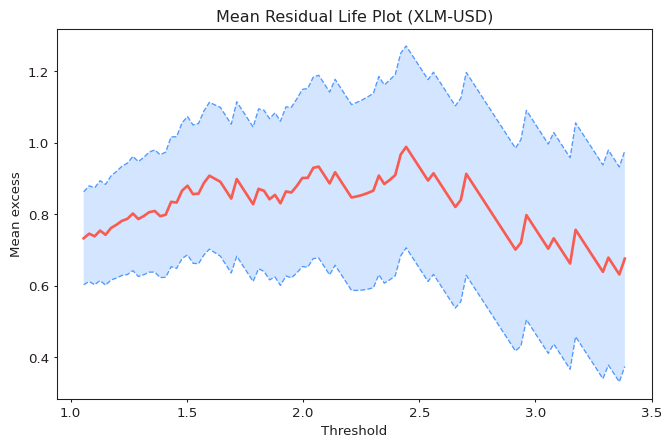


XLM-USD Standardized Residuals:
Date
2021-01-03   -0.417510
2021-01-04   -1.406461
2021-01-05   -1.195416
2021-01-06   -3.653120
2021-01-07    0.112901
Name: std_resid, dtype: float64
Plotting Mean Residual Life for AVAX-USD...


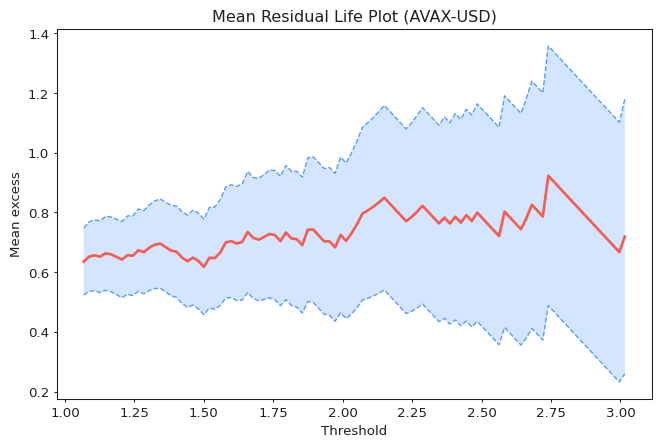


AVAX-USD Standardized Residuals:
Date
2021-01-03    0.043684
2021-01-04   -0.288597
2021-01-05   -1.512296
2021-01-06   -0.733636
2021-01-07    0.268965
Name: std_resid, dtype: float64
Plotting Mean Residual Life for LEO-USD...


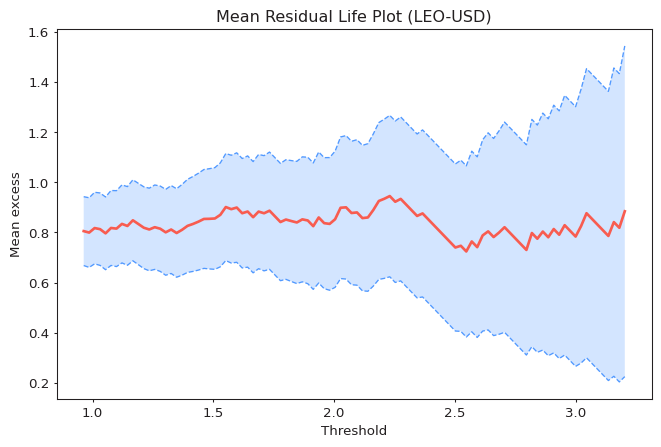


LEO-USD Standardized Residuals:
Date
2021-01-03    0.171834
2021-01-04    0.256465
2021-01-05   -0.045847
2021-01-06    0.366110
2021-01-07    0.585686
Name: std_resid, dtype: float64
Plotting Mean Residual Life for BCH-USD...


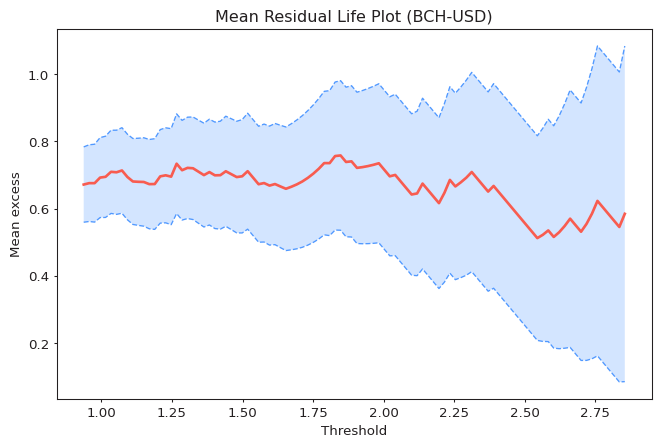


BCH-USD Standardized Residuals:
Date
2021-01-03   -1.829684
2021-01-04    0.168205
2021-01-05   -0.261537
2021-01-06   -0.904196
2021-01-07    0.045691
Name: std_resid, dtype: float64
Plotting Mean Residual Life for LTC-USD...


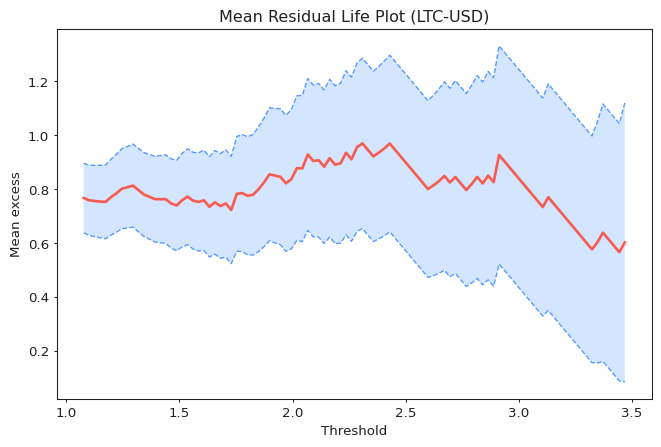


LTC-USD Standardized Residuals:
Date
2021-01-03   -2.154232
2021-01-04    0.301991
2021-01-05   -0.257000
2021-01-06   -0.821225
2021-01-07   -0.080244
Name: std_resid, dtype: float64
Plotting Mean Residual Life for DOT-USD...


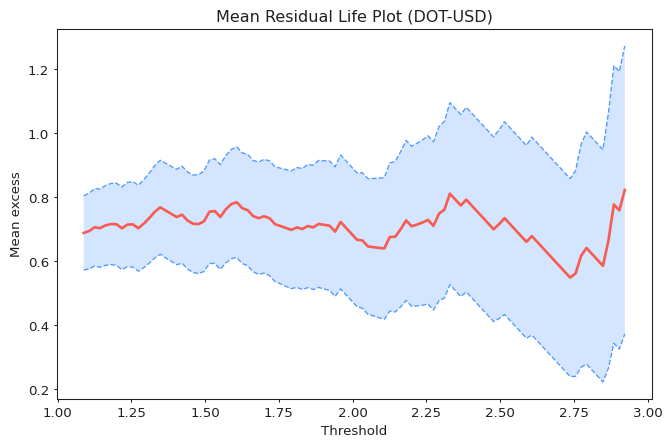


DOT-USD Standardized Residuals:
Date
2021-01-03   -0.834013
2021-01-04    0.515932
2021-01-05   -0.227467
2021-01-06   -0.431417
2021-01-07    0.479782
Name: std_resid, dtype: float64
Plotting Mean Residual Life for OM-USD...


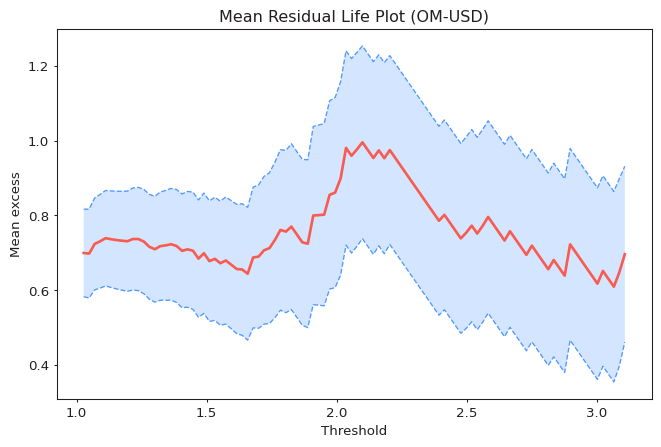


OM-USD Standardized Residuals:
Date
2021-01-03   -1.595878
2021-01-04    0.653977
2021-01-05    0.478537
2021-01-06   -1.065240
2021-01-07    0.079617
Name: std_resid, dtype: float64


In [12]:
# Loop through each cryptocurrency's residuals
for crypto, residuals in crypto_residuals.items():
    # Drop NaN values and reset index
    residuals = residuals.dropna()
    std_residuals = residuals.reset_index(drop=True)

    # Plot Mean Residual Life for the standardized residuals
    print(f"Plotting Mean Residual Life for {crypto}...")
    ax = plot_mean_residual_life(residuals)
    ax.set_title(f"Mean Residual Life Plot ({crypto})")  # Add title with the coin name

    # Save the plot with the crypto name
    # plt.savefig(f'{crypto}_mean_residual_life.png', dpi=300)
    plt.show()

    # Display first few rows for verification
    print(f"\n{crypto} Standardized Residuals:")
    print(residuals.head())


### Parameter Stability Plots

Plotting Parameter Stability for BTC-USD...


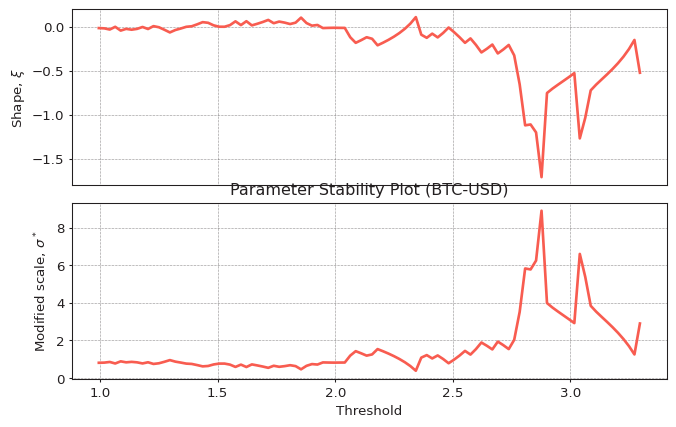

Plotting Parameter Stability for ETH-USD...


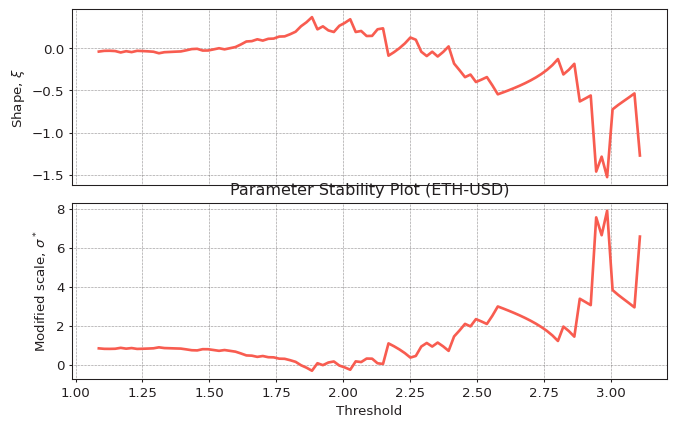

Plotting Parameter Stability for USDT-USD...


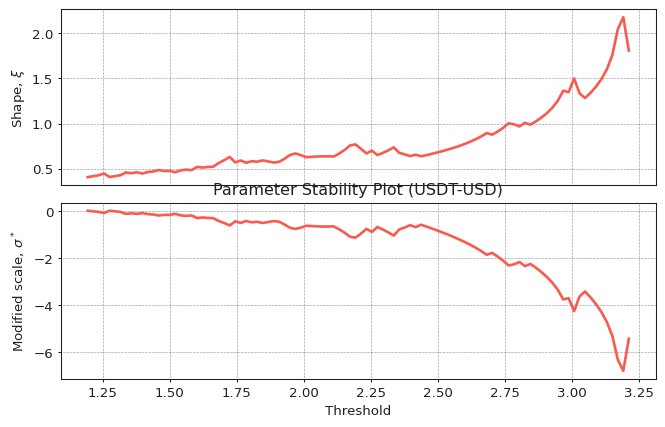

Plotting Parameter Stability for XRP-USD...


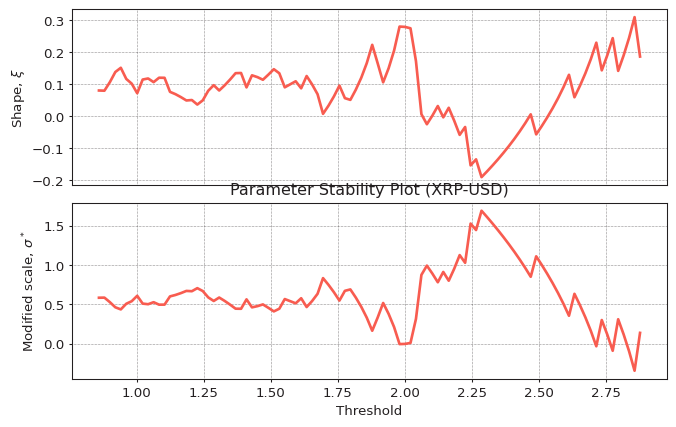

Plotting Parameter Stability for DOGE-USD...


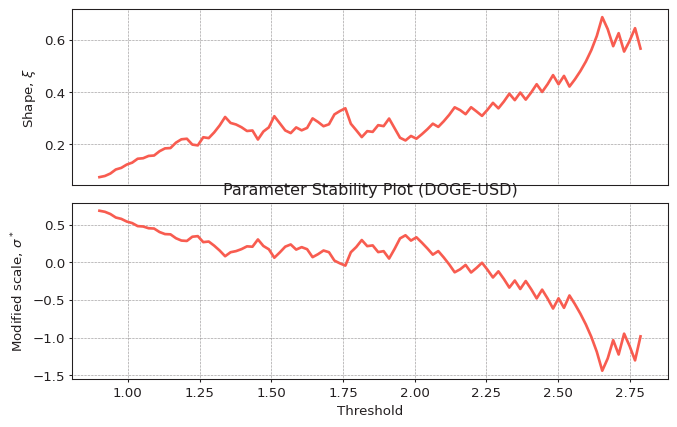

Plotting Parameter Stability for ADA-USD...


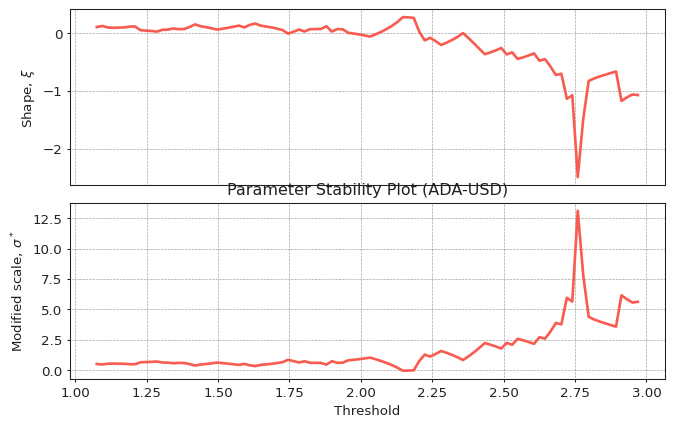

Plotting Parameter Stability for TRX-USD...


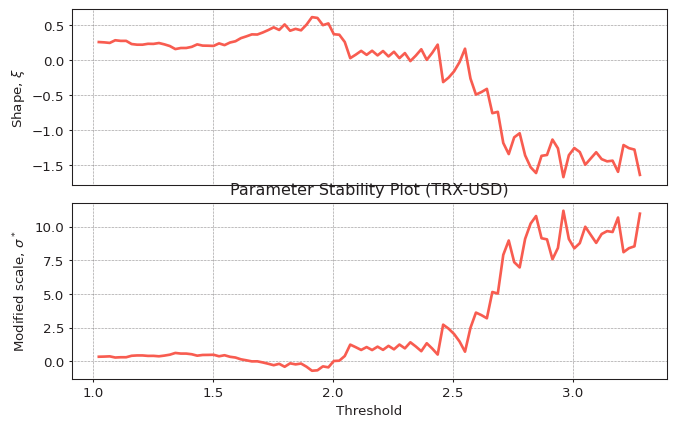

Plotting Parameter Stability for LINK-USD...


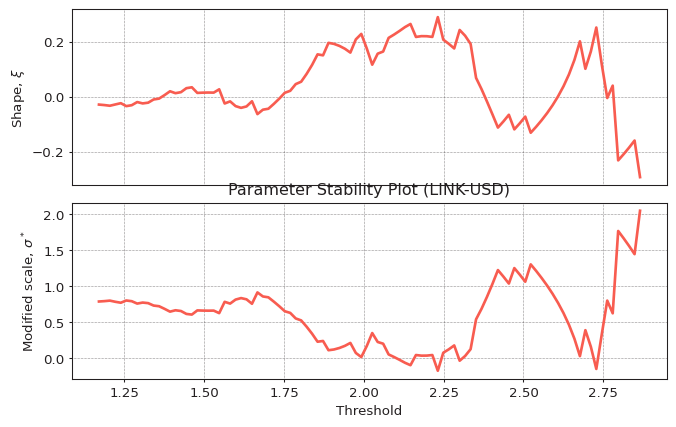

Plotting Parameter Stability for XLM-USD...


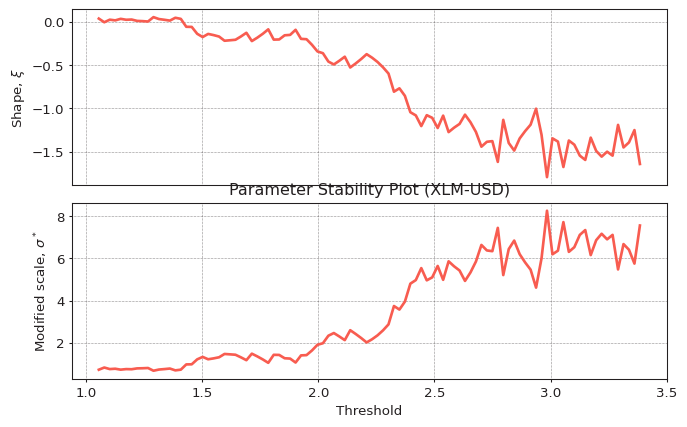

Plotting Parameter Stability for AVAX-USD...


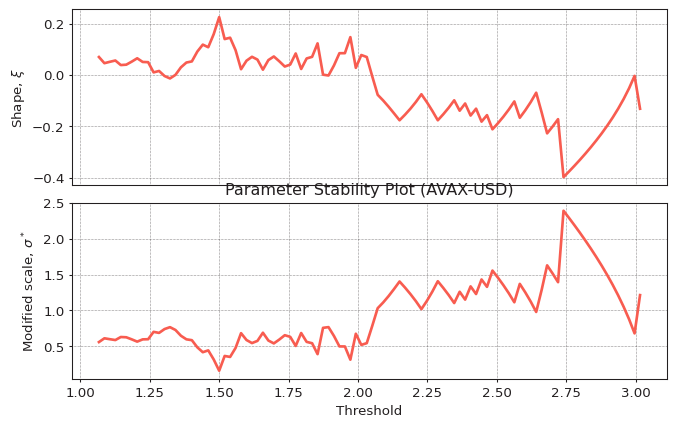

Plotting Parameter Stability for LEO-USD...


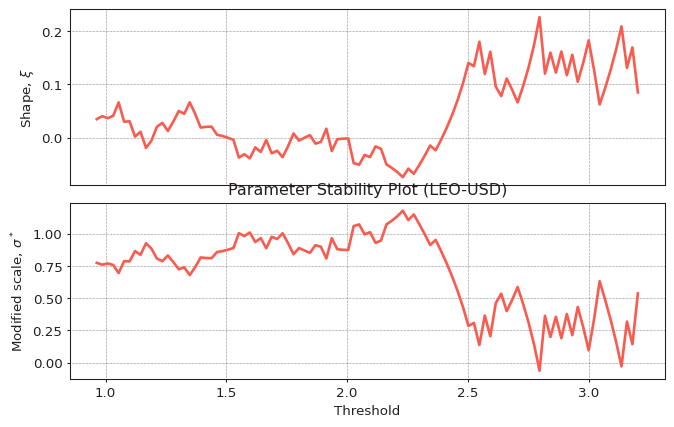

Plotting Parameter Stability for BCH-USD...


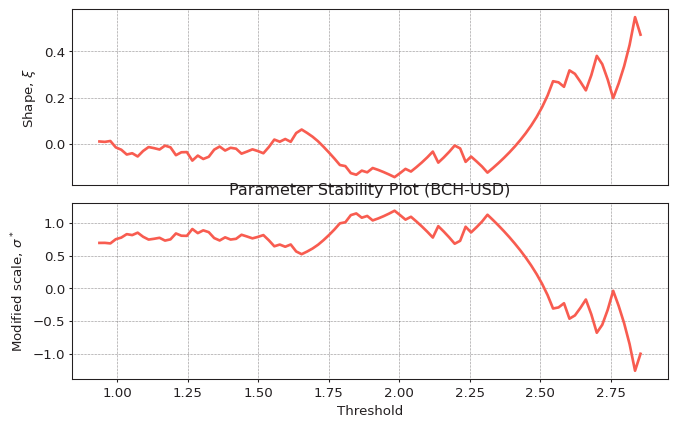

Plotting Parameter Stability for LTC-USD...


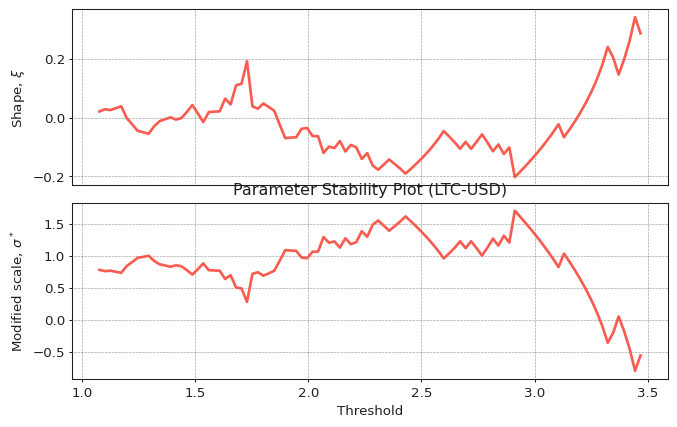

Plotting Parameter Stability for DOT-USD...


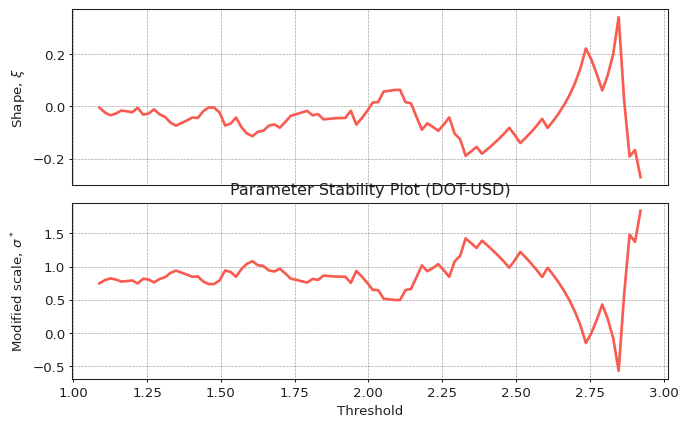

Plotting Parameter Stability for OM-USD...


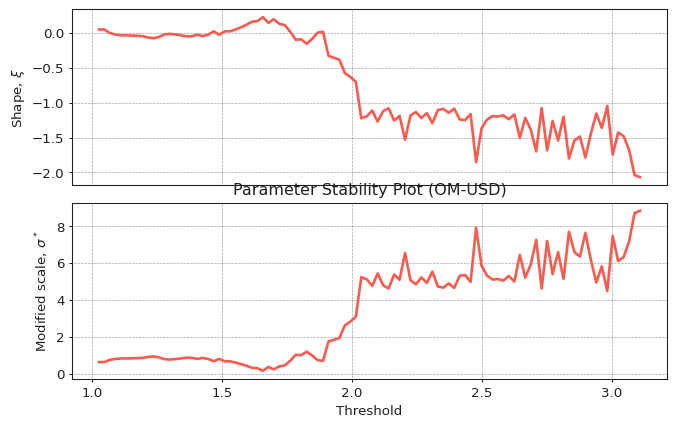

In [13]:
# Loop through each cryptocurrency's residuals
for crypto, residuals in crypto_residuals.items():
    # Drop NaN values and reset index
    residuals = residuals.dropna()

    # Plot Parameter Stability
    print(f"Plotting Parameter Stability for {crypto}...")
    fig, ax = plot_parameter_stability(residuals)  # Unpack the figure and axes
    ax.set_title(f"Parameter Stability Plot ({crypto})")  # Add title with the coin name

    # Save the plot with the crypto name
    # plt.savefig(f'{crypto}_parameter_stability.png', dpi=300)
    plt.show()
